In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./dataset/autos.csv")
x_data = df.iloc[:, 0].values
y_data = df.iloc[:, 1].values

df.head(10)

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450
5,2,audi,gas,std,2,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8,110,5500,19,25,15250
6,1,audi,gas,std,4,sedan,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8,110,5500,19,25,17710
7,1,audi,gas,std,4,wagon,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,8,110,5500,19,25,18920
8,1,audi,gas,turbo,4,sedan,fwd,front,105.8,192.7,...,131,mpfi,3.13,3.40,8,140,5500,17,20,23875
9,2,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,...,108,mpfi,3.50,2.80,8,101,5800,23,29,16430


In [7]:
# df.shape()

In [8]:
# plt.scatter(x_data,y_data)
# plt.show()
# print(x_data.shape)

In [9]:
features = ["highway_mpg", "engine_size", "horsepower", "curb_weight"]

X = df.copy()
y = X.pop('price')
X = X.loc[:, features]
X.head(10)


# Standardize
# X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

,highway_mpg,engine_size,horsepower,curb_weight
0,27,130,111,2548
1,27,130,111,2548
2,26,152,154,2823
3,30,109,102,2337
4,22,136,115,2824
5,25,136,110,2507
6,25,136,110,2844
7,25,136,110,2954
8,20,131,140,3086
9,29,108,101,2395


In [10]:
y.head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int64

# PCA Algorithm

## Steps

### Step 1
對數據標準化, 使得數據在相同區間比較好比較
也就是計算標準差 variance

### Step 2
計算 covariance (共變異數)

### Step 3
分解 covariance 求 covariance 的 eigen value & eigen vector
也就是對 covariance 作 SVD decomposition

### Step 4
選擇值最大的k個特徵值對應的特徵向量

### Step 5
利用k特徵向量建立投影矩陣

In [11]:
def zero_mean(data_mat):
    mean_val = np.mean(data_mat, axis=0)
    new_data = data_mat - mean_val
    return new_data, mean_val

def pca(data_mat):
    # 求標準差矩陣
    new_data, mean_val = zero_mean(data_mat)
    covar_mat = np.cov(new_data, rowvar=False)
    
    # 求標準差矩陣的 eigen value & eigen vector
    eigen_val, eigen_vector = np.linalg.eig(covar_mat)
    
    # Step 4
    top = 4
    sorted_eigen_val = np.argsort(eigen_val)
    """
    top is a variable that has been assigned the value 2 earlier in your code.

    sorted_eigen_val[-1:-(top+1):-1] is an array slicing operation. It's used to extract the top top indices from the sorted_eigen_val array in descending order.

    Let's break down the slicing operation:
    -1 is the starting index of the slice, which is the last element of the sorted_eigen_val array.
    -(top+1) is the ending index of the slice. Since top is 2, -(top+1) is equivalent to -3. This means the slice will go up to, but not
    including, the element at index -3. In Python, negative indices count from the end of the array, so -3 refers to the third-to-last
    element.
    -1 is the step value. It indicates that the slicing operation moves from the last element to the third-to-last element,
    taking each step in reverse order (i.e., in descending order).
    So, the n_eigValIndice array will contain the indices of the top 2 sorted values from the eigen_val array in descending order,
    as determined by the sorted_eigen_val array. 
    """
    k_eigen_vals = sorted_eigen_val[-1:-(top+1):-1]

    # Project eigen vectors
    k_eigen_vectors = eigen_vector[:, k_eigen_vals]
    # low_dimension_data_mat = new_data * k_eigen_vectors
    low_dimension_data_mat = np.dot(new_data, k_eigen_vectors)
    # reconstruct_mat = (low_dimension_data_mat * k_eigen_vectors.T)
    reconstruct_mat = np.dot(low_dimension_data_mat, k_eigen_vectors.T)
    # reconstruct_mat += mean_val
    return reconstruct_mat

pca_res = pca(X)

In [12]:
# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(pca_res.shape[1])]
X_pca = pd.DataFrame(pca_res, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4
0,-3.787565,1.875648,7.518135,-13.507772
1,-3.787565,1.875648,7.518135,-13.507772
2,-4.787565,23.875648,50.518135,261.492228
3,-0.787565,-19.124352,-1.481865,-224.507772
4,-8.787565,7.875648,11.518135,262.492228


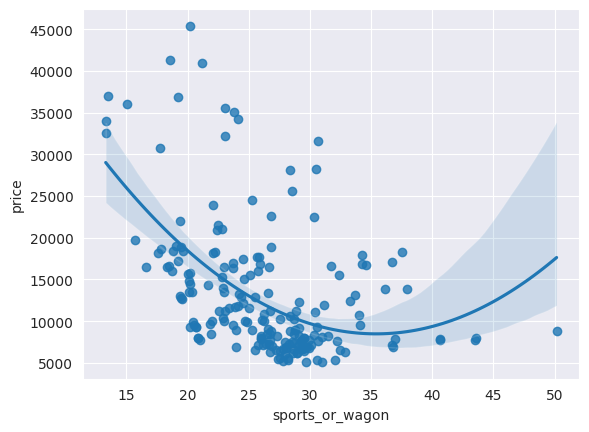

In [13]:
df["sports_or_wagon"] = X.curb_weight / X.horsepower
sns.regplot(x="sports_or_wagon", y='price', data=df, order=2);